<a href="https://colab.research.google.com/github/BayuArdi25/KelompokAmbatron/blob/main/DLchatbot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
!pip install google-generativeai python-dotenv transformers bert_score matplotlib numpy
%pip install -U --quiet langchain-google-genai langchain faiss-cpu pypdf sentence-transformers
!pip install fpdf2
!pip install -U langchain-community

Masukkan pertanyaan Anda: Kutipan apa yang kamu buat?
Jawaban yang dihasilkan: "Sains
tanpa agama adalah lumpuh, agama tanpa sains adalah buta."
BERTScore Precision: 0.89
BERTScore Recall: 0.78
BERTScore F1: 0.83


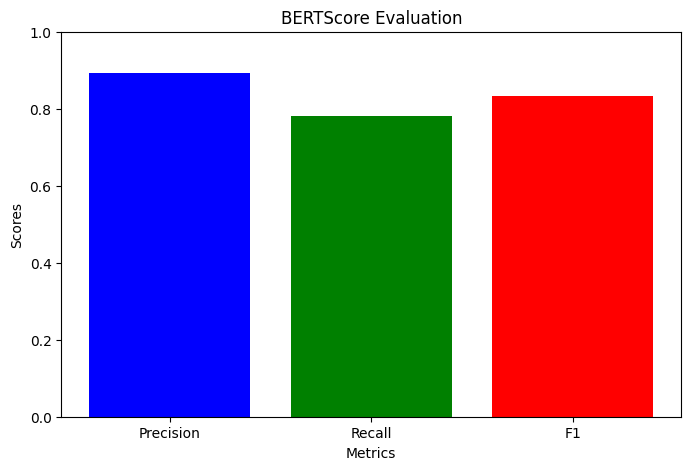

In [43]:
from langchain.document_loaders import PyPDFLoader
from langchain.embeddings import HuggingFaceEmbeddings
from langchain import FAISS
from transformers import pipeline
from bert_score import score
import matplotlib.pyplot as plt

# Load and split the PDF document
loader = PyPDFLoader("./dataset.pdf")
pages = loader.load_and_split()

# Initialize embeddings and FAISS
embeddings = HuggingFaceEmbeddings(model_name="all-MiniLM-L6-v2")
db = FAISS.from_documents(pages, embeddings)

# Perform similarity search
query = input("Masukkan pertanyaan Anda: ")
docs = db.similarity_search(query)

# Combine the relevant content
content = "\n".join([x.page_content for x in docs])

# Initialize and use the Hugging Face QA model
qa_model = pipeline("question-answering", model="Rifky/Indobert-QA", tokenizer="Rifky/Indobert-QA")
qa_input = {"question": query, "context": content}
result = qa_model(qa_input)
generated_answer = result['answer']

# Print the generated answer
print("Jawaban yang dihasilkan:", generated_answer)

# Reference answer (replace this with the correct answer for evaluation)
reference_answer ="Saya melihat agama dan sains sebagai dua hal yang bisa saling melengkapi. Saya terkenal dengan kutipan, Sains tanpa agama adalah lumpuh, agama tanpa sains adalah buta."

if reference_answer:
    # Calculate BERTScore
    P, R, F1 = score([generated_answer], [reference_answer], lang="id")

    # Simplify the output to two decimal places
    P_mean = P.mean().item()
    R_mean = R.mean().item()
    F1_mean = F1.mean().item()

    print(f"BERTScore Precision: {P_mean:.2f}")
    print(f"BERTScore Recall: {R_mean:.2f}")
    print(f"BERTScore F1: {F1_mean:.2f}")

    # Plotting the BERTScore results
    scores = [P_mean, R_mean, F1_mean]
    labels = ['Precision', 'Recall', 'F1']

    plt.figure(figsize=(8, 5))
    plt.bar(labels, scores, color=['blue', 'green', 'red'])
    plt.ylim(0, 1)
    plt.xlabel('Metrics')
    plt.ylabel('Scores')
    plt.title('BERTScore Evaluation')
    plt.show()
else:
    print("Tidak ada jawaban referensi yang dimasukkan. Evaluasi BERTScore tidak dilakukan.")
